In [6]:
"""
Created on July 2024
@author: Théotime de la Selle
"""

# import os, sys, time, random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
import nltk as nl
# from nltk.tokenize import word_tokenize,wordpunct_tokenize
# from nltk.stem import WordNetLemmatizer,PorterStemmer
# from nltk.corpus import words
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# from scipy.signal import correlate

# Load and verify data

In [7]:
Evangiles = pickle.load(open("data/Evangiles.pkl", "rb"))
Mark = pickle.load(open("data/Mark.pkl", "rb"))
Matt = pickle.load(open("data/Matt.pkl", "rb"))
Luke = pickle.load(open("data/Luke.pkl", "rb"))
John = pickle.load(open("data/John.pkl", "rb"))

# Ev_verses = Evangiles.shape[0]
display(Evangiles.sample(5))

DM_Ev = pickle.load(open("distance_matrices/dist_mat_Ev.pkl", "rb"))
DM_Mc = pickle.load(open("distance_matrices/dist_mat_Mc.pkl", "rb"))
DM_Mt = pickle.load(open("distance_matrices/dist_mat_Mt.pkl", "rb"))
DM_Lc = pickle.load(open("distance_matrices/dist_mat_Lc.pkl", "rb"))
DM_Jn = pickle.load(open("distance_matrices/dist_mat_Jn.pkl", "rb"))

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
3549,John 15:6,ἐὰν μή τις μένηι ἐν ἐμοί ἐβλήθη ἔξω ὡς τὸ κλῆμ...,"[ἐὰν, μή, τις, μένηι, ἐν, ἐμοί, ἐβλήθη, ἔξω, ὡ...","[ἐάν, μή, τὶς, μένηι, ἐν, ἐγώ, βάλλω, ἔξω, ὡς,...","[μή, μένηι, ἐμοί, ἐβλήθη, ἔξω, κλῆμα, ἐξηράνθη...","[μένω, ἐγώ, βάλλω, ἔξω, κλῆμα, ξηραίνω, συνάγ...","[(μένω, ἐγώ), (ἐγώ, βάλλω), (βάλλω, ἔξω), (ἔξω...","[(μένω, ἐγώ, βάλλω), (ἐγώ, βάλλω, ἔξω), (βάλλω...","[0.13323128957118277, 0.28584283839665475, 0.3...","[subordinating_conjunction, adverb, adjective,...","[[], [], [(nominative, accusative, ergative, a...","[βάλλω, καίω, κλῆμα, μένω, ξηραίνω, πῦρ, συνά..."
1096,Mark 1:29,καὶ εὐθὺς ἐκ τῆς συναγωγῆς ἐξελθόντες ἦλθον εἰ...,"[καὶ, εὐθὺς, ἐκ, τῆς, συναγωγῆς, ἐξελθόντες, ἦ...","[καί, εὐθύς, ἐκ, ὁ, συναγωγή, ἐξέρχομαι, ἔρχομ...","[εὐθὺς, συναγωγῆς, ἐξελθόντες, ἦλθον, οἰκίαν, ...","[συναγωγή, ἐξέρχομαι, ἔρχομαι, οἰκία, σίμων, ἀ...","[(συναγωγή, ἐξέρχομαι), (ἐξέρχομαι, ἔρχομαι), ...","[(συναγωγή, ἐξέρχομαι, ἔρχομαι), (ἐξέρχομαι, ἔ...","[0.2132693591693105, 0.28133742642393345, 0.34...","[coordinating_conjunction, adverb, adposition,...","[[], [], [], [(nominative, accusative, ergativ...","[ιὤαννης, οἰκία, σίμων, συναγωγή, ἀνδρέης, ἐξέ..."
715,Matt 21:36,πάλιν ἀπέστειλεν ἄλλους δούλους πλείονας τῶν π...,"[πάλιν, ἀπέστειλεν, ἄλλους, δούλους, πλείονας,...","[πάλιν, ἀποστέλλω, ἄλλος, δοῦλος, πολύς, ὁ, πρ...","[πάλιν, ἀπέστειλεν, δούλους, πλείονας, πρώτων,...","[πάλιν, ἀποστέλλω, δοῦλος, πλείων, πρῶτος, ποι...","[(πάλιν, ἀποστέλλω), (ἀποστέλλω, δοῦλος), (δοῦ...","[(πάλιν, ἀποστέλλω, δοῦλος), (ἀποστέλλω, δοῦλο...","[0.25154519595518676, 0.33176504386796846, 0.3...","[adverb, verb, adjective, noun, adjective, det...","[[], [(habitual, imperfective, iterative, perf...","[δοῦλος, πάλιν, πλείων, ποιέω, πρῶτος, ἀποστέλ..."
15,Matt 1:16,ἰακὼβ δὲ ἐγέννησεν τὸν ἰωσὴφ τὸν ἄνδρα μαρίας ...,"[ἰακὼβ, δὲ, ἐγέννησεν, τὸν, ἰωσὴφ, τὸν, ἄνδρα,...","[ἰακώβ, δέ, γεννάω, ὁ, ἰωσήφ, ὁ, ἀνήρ, μαρία, ...","[ἰακὼβ, ἐγέννησεν, ἰωσὴφ, ἄνδρα, μαρίας, ἐγενν...","[ἰακὼβ, γεννάω, ἰωσὴφ, ἀνήρ, μαρίας, γεννάω, ἰ...","[(ἰακὼβ, γεννάω), (γεννάω, ἰωσὴφ), (ἰωσὴφ, ἀνή...","[(ἰακὼβ, γεννάω, ἰωσὴφ), (γεννάω, ἰωσὴφ, ἀνήρ)...","[0.15869698290248596, 0.31077689171271283, 0.5...","[noun, adverb, verb, determiner, proper_noun, ...","[[(nominative, accusative, ergative, absolutiv...","[γεννάω, λέγω, μαρίας, χριστός, ἀνήρ, ἰακὼβ, ἰ..."
408,Matt 13:14,καὶ ἀναπληροῦται αὐτοῖς ἡ προφητεία ἠσαΐου ἡ λ...,"[καὶ, ἀναπληροῦται, αὐτοῖς, ἡ, προφητεία, ἠσαΐ...","[καί, ἀναπληρόω, αὐτός, ὁ, προφητεία, ἠσαΐας, ...","[ἀναπληροῦται, αὐτοῖς, προφητεία, ἠσαΐου, λέγο...","[ἀναπληρόω, προφητεία, ἠσαΐου, λέγω, ἀκοή, ἀκο...","[(ἀναπληρόω, προφητεία), (προφητεία, ἠσαΐου), ...","[(ἀναπληρόω, προφητεία, ἠσαΐου), (προφητεία, ἠ...","[0.11765689936463737, 0.18538176930156372, 0.1...","[coordinating_conjunction, verb, pronoun, dete...","[[], [(admirative, conditional, desiderative, ...","[βλέπω, εἶδον, λέγω, προφητεία, συνίημι, ἀκοή,..."


# Edit distance test on 2 verses

In [63]:
# Edit distance test on verses
id_verse_1 = "Mark 8:35"
id_verse_2 = "Luke 9:24"

id_verse_1 = "Matt 17:23"
id_verse_2 = "Mark 9:31"

def extract_verse(id_verse,df):   
    extracted_verse = df[df.verses == id_verse].reset_index(drop=True)
    display(extracted_verse)
    return extracted_verse

# Find the verses in dataframes
v_1 = extract_verse(id_verse_1,Evangiles)
v_2 = extract_verse(id_verse_2,Evangiles)

def compute_distance(v_1,v_2,method,info=False,transpos=False):
    str_v1 = v_1[method][0]
    len_v1 = len(str_v1)
    str_v2 = v_2[method][0]
    len_v2 = len(str_v2)
   
    # Compute edit distance
    # edit_dist = min((nl.edit_distance(str_v1,str_v2,transpositions=transpos)-abs(len_v1-len_v2)+1)/min(len_v1,len_v2),1.0)  # Normalized distance 1
    edit_dist = (nl.edit_distance(str_v1,str_v2,transpositions=transpos)-abs(len_v1-len_v2)+1)/(min(len_v1,len_v2)+1)  # Normalized distance 1
    # edit_dist = (nl.edit_distance(str_v1, str_v2,transpositions=transpos))/np.max([len_v1,len_v2])                # Normalized distance  2  
    # edit_dist = (nl.edit_distance(str_v1, str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)                          # Raw distance (unity : words/characters)

    if info == True:
        print("\n-----",method,"-----\n")
        print(str_v1)
        print(str_v2)
        print(f"Edit distance between 2 verses :",edit_dist)
    return edit_dist

compute_distance(v_1,v_2,'text',True)
compute_distance(v_1,v_2,'tokens',True,True)
compute_distance(v_1,v_2,'lemmata',True,True)
compute_distance(v_1,v_2,'tokens_filtered',True,True)
compute_distance(v_1,v_2,'lemmata_filtered',True,True)
compute_distance(v_1,v_2,'pos',True,True)
compute_distance(v_1,v_2,'morpho',True,True)
compute_distance(v_1,v_2,'vocabulary',True,True)

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
0,Matt 17:23,καὶ ἀποκτενοῦσιν αὐτόν καὶ τῆι τρίτηι ἡμέραι ἐ...,"[καὶ, ἀποκτενοῦσιν, αὐτόν, καὶ, τῆι, τρίτηι, ἡ...","[καί, ἀποκτείνω, αὐτός, καί, τῆι, τρίτηι, ἡμέρ...","[ἀποκτενοῦσιν, αὐτόν, τῆι, τρίτηι, ἡμέραι, ἐγε...","[ἀποκτείνω, τρίτος, ἡμέρα, ἐγείρω, λυπέω, σφόδρα]","[(ἀποκτείνω, τρίτος), (τρίτος, ἡμέρα), (ἡμέρα,...","[(ἀποκτείνω, τρίτος, ἡμέρα), (τρίτος, ἡμέρα, ἐ...","[0.2851670401668937, 0.4864007856926818, 0.347...","[coordinating_conjunction, verb, pronoun, coor...","[[], [(admirative, conditional, desiderative, ...","[λυπέω, σφόδρα, τρίτος, ἀποκτείνω, ἐγείρω, ἡμέρα]"


,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
0,Mark 9:31,ἐδίδασκεν γὰρ τοὺς μαθητὰς αὐτοῦ καὶ ἔλεγεν αὐ...,"[ἐδίδασκεν, γὰρ, τοὺς, μαθητὰς, αὐτοῦ, καὶ, ἔλ...","[διδάσκω, γάρ, ὁ, μαθητής, αὐτός, καί, λέγω, α...","[ἐδίδασκεν, μαθητὰς, αὐτοῦ, ἔλεγεν, αὐτοῖς, υἱ...","[διδάσκω, μαθητὰς, λέγω, υἱός, ἄνθρωπος, παραδ...","[(διδάσκω, μαθητὰς), (μαθητὰς, λέγω), (λέγω, υ...","[(διδάσκω, μαθητὰς, λέγω), (μαθητὰς, λέγω, υἱό...","[0.2016529791524156, 0.12798380533373704, 0.21...","[verb, adverb, determiner, noun, pronoun, coor...","[[(habitual, imperfective, iterative, perfecti...","[διδάσκω, λέγω, μαθητὰς, παραδίδωμι, τρεῖς, υἱ..."



----- text -----

καὶ ἀποκτενοῦσιν αὐτόν καὶ τῆι τρίτηι ἡμέραι ἐγερθήσεται καὶ ἐλυπήθησαν σφόδρα
ἐδίδασκεν γὰρ τοὺς μαθητὰς αὐτοῦ καὶ ἔλεγεν αὐτοῖς ὅτι ὁ υἱὸς τοῦ ἀνθρώπου παραδίδοται εἰς χεῖρας ἀνθρώπων καὶ ἀποκτενοῦσιν αὐτόν καὶ ἀποκτανθεὶς μετὰ τρεῖς ἡμέρας ἀναστήσεται
Edit distance between 2 verses : 0.5316455696202531

----- tokens -----

['καὶ', 'ἀποκτενοῦσιν', 'αὐτόν', 'καὶ', 'τῆι', 'τρίτηι', 'ἡμέραι', 'ἐγερθήσεται', 'καὶ', 'ἐλυπήθησαν', 'σφόδρα']
['ἐδίδασκεν', 'γὰρ', 'τοὺς', 'μαθητὰς', 'αὐτοῦ', 'καὶ', 'ἔλεγεν', 'αὐτοῖς', 'ὅτι', 'ὁ', 'υἱὸς', 'τοῦ', 'ἀνθρώπου', 'παραδίδοται', 'εἰς', 'χεῖρας', 'ἀνθρώπων', 'καὶ', 'ἀποκτενοῦσιν', 'αὐτόν', 'καὶ', 'ἀποκτανθεὶς', 'μετὰ', 'τρεῖς', 'ἡμέρας', 'ἀναστήσεται']
Edit distance between 2 verses : 0.8333333333333334

----- lemmata -----

['καί', 'ἀποκτείνω', 'αὐτός', 'καί', 'τῆι', 'τρίτηι', 'ἡμέρα', 'ἐγείρω', 'καί', 'λυπέω', 'σφόδρα']
['διδάσκω', 'γάρ', 'ὁ', 'μαθητής', 'αὐτός', 'καί', 'λέγω', 'αὐτός', 'ὅτι', 'ὁ', 'υἱός', 'ὁ', 'ἄνθρωπος', 'παραδί

0.7142857142857143

# Set of verses comparison

In [10]:
def comparison(v_1,len_1,v_2,len_2,df,DM):

    # Find verses indexes
    v_1_id = df.loc[df["verses"]==v_1].index[0]
    v_2_id = df.loc[df["verses"]==v_2].index[0]
    
    # Building grid matrix for extraction
    grid = np.indices((len_1,len_2))
    row = [g+v_1_id for g in grid[0]]
    col = [g+v_2_id for g in grid[1]]

    print(DM[2][v_1_id,v_2_id])
    
    # Extract reduced similarity matrices
    DM = [np.triu(M, k=1)+np.triu(M, k=1).T for M in DM]
    DM_ext = [M[row,col] for M in DM]

    if len_1<len_2: DM_ext = [M.T for M in DM_ext]   
    
    # Compute metrics through mean of maximum correspondance couples
    txt_metrics = []
    id_association = []
    for M in DM_ext:
        mini = []
        idx = []
        for i in range(max(len_1,len_2)):
            mini.append(np.min(M))
            idx.append(np.where(M==mini[i]))
            # M = np.delete(M,idx[i][0][0],0)     # Delete the row of the minimum
            M[idx[i]] = 1.0   # exclude minimum value at each step
                          
        txt_metrics.append(mini)
        id_association.append(idx)

    txt_metrics_mean = [np.mean(values) for values in txt_metrics]
    
    return txt_metrics_mean

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

### Verses selection and radar plot

In [42]:
verse_1 = "Matt 17:23"
verse_1 = "Luke 9:22"
set_verses_len_1 = 3
verse_1 = "Mark 8:34"
verse_2 = "Luke 9:23"
set_verses_len_2 = 3

0.5384615384615384
[0.45405982905982906, 0.35042735042735046, 0.308058608058608, 0.4351851851851852, 0.48701298701298706, 0.37606837606837606, 1.0]


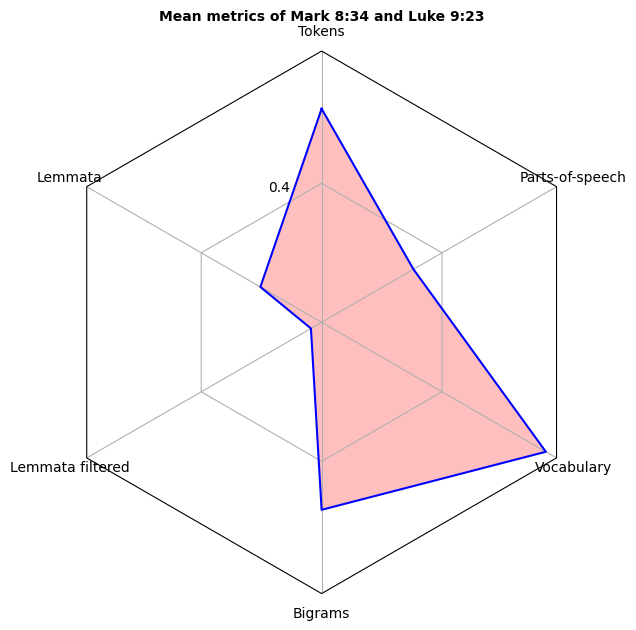

In [43]:
theta = radar_factory(6, frame='polygon')

metrics_values = comparison(verse_1,set_verses_len_1,verse_2,set_verses_len_2,Evangiles,DM_Ev)
print(metrics_values)
data = [
    ['Tokens','Lemmata','Lemmata filtered','Bigrams','Vocabulary', 'Parts-of-speech'],
    ('Mean metrics of '+verse_1+' and '+verse_2, metrics_values[0:6])]

# spoke_labels = data.pop(0)

fig, axs = plt.subplots(figsize=(7, 7), nrows=1, ncols=1,
                        subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b']
title,case_data = data[1]
axs.set_rgrids([0.2, 0.4, 0.6, 0.8])
axs.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
             horizontalalignment='center', verticalalignment='center')
axs.plot(theta, case_data,color='b')
axs.fill(theta, case_data, facecolor='r', alpha=0.25, label='_nolegend_')
axs.set_varlabels(data[0])

# add legend relative to top-left plot
# labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
# legend = axs[0].legend(labels, loc=(0.9, .95),
#                           labelspacing=0.1, fontsize='small')

# fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
#          horizontalalignment='center', color='black', weight='bold',
#          size='large')

plt.show()